In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.metrics import r2_score

# XY decoding

In [2]:
with open('pickles/09_query_token_decoding_x_y.pkl', 'rb') as f:
    results = pickle.load(f)

In [3]:
score_x = results['test_score_x']
score_y = results['test_score_y']
x = results['test_x']
pred_x = results['test_pred_x']
y = results['test_y']
pred_y = results['test_pred_y']


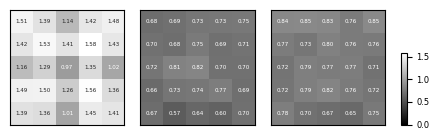

In [4]:
fig = plt.figure(figsize=(4.5, 1.5))
gs = fig.add_gridspec(3, 4, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1, 0.05])
axs = [fig.add_subplot(gs[:,i]) for i in range(3)]
cbar_ax = fig.add_subplot(gs[1:, 3])
x_unique = np.unique(x)
y_unique = np.unique(y)

score_grids = []
for layer in range(1, len(score_x)):
    ax = axs[layer-1]
    score_grid = np.full((len(y_unique), len(x_unique)), np.nan)
    _score_x = np.array(score_x[layer])
    _score_y = np.array(score_y[layer])
    _x = np.array(x[layer])
    _y = np.array(y[layer])
    for x_idx, x_val in enumerate(x_unique):
        for y_idx, y_val in enumerate(y_unique):
            mask = (_x == x_val) & (_y == y_val)
            if np.any(mask):
                combined_score = _score_x + _score_y
                score_grid[y_idx, x_idx] = np.mean(combined_score[mask])
    score_grids.append(score_grid)

vmin = 0 #min(m.min() for m in score_grids)
vmax = max(m.max() for m in score_grids)    
for layer, score_grid in enumerate(score_grids):       # Plot heatmap
    ax = axs[layer]
    im = sns.heatmap(score_grid, annot=True, fmt=".2f", cmap="gray", 
                            xticklabels=x_unique, yticklabels=y_unique, ax=ax,
                            vmin=vmin, vmax=vmax, cbar=False, annot_kws={'size': 4},
                            square=True)
    ax.set_aspect('equal', 'box')
    ax.set_box_aspect(1)
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(True)

cbar = fig.colorbar(im.collections[0], cax=cbar_ax)
cbar.ax.tick_params(labelsize=6)

# Adjust layout to prevent overlap
plt.tight_layout()  # Leave space for colorbar
plt.savefig('figs/5b.png', transparent=True, dpi=300)
plt.savefig('figs/5b.pdf', transparent=True, dpi=300)
plt.show()

# Angle to Goal

In [5]:
with open('pickles/09_query_token_decoding_goal_angle.pkl', 'rb') as f:
    results = pickle.load(f)

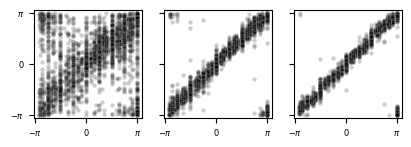

In [6]:
fig = plt.figure(figsize=(4.75, 1.75))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])
axs = [fig.add_subplot(gs[:,i]) for i in range(3)]

for layer in range(1, len(score_x)):
    ax = axs[layer-1]
    y = results['test_y'][layer]
    pred_y = results['test_pred'][layer]
    im = sns.scatterplot(x=y, y=pred_y, ax=ax, s=10, alpha=0.2, color='black')
    ax.set_aspect('equal', 'box')
    ax.set_box_aspect(1)
    ax.set_xticks([np.pi, 0, -np.pi], labels=[r'$\pi$', '0', r'$-\pi$'], fontsize=6)
    if layer == 1:
        ax.set_yticks([np.pi, 0, -np.pi], labels=[r'$\pi$', '0', r'$-\pi$'], fontsize=6)
    else:
        ax.set_yticks([np.pi, 0, -np.pi], labels=['', '', ''], fontsize=6)
    for spine in ax.spines.values():
        spine.set_visible(True)

# Adjust layout to prevent overlap
plt.savefig('figs/5c.png', transparent=True, dpi=300)
plt.savefig('figs/5c.pdf', transparent=True, dpi=300)
plt.show()

# Value Decoding by Action Distance and Euclidean Distance

In [8]:
with open('pickles/09_query_token_decoding_q_value_dist.pkl', 'rb') as f:
    grid_results = pickle.load(f)

In [9]:
with open('pickles/09_query_token_decoding_q_value_euclidean_dist.pkl', 'rb') as f:
    euclid_results = pickle.load(f)

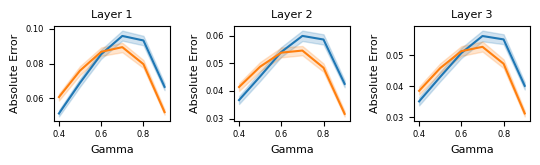

In [10]:
fig = plt.figure(figsize=(5.5, 1.75))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])
axs = [fig.add_subplot(gs[:,i]) for i in range(3)]

for layer in range(1, 4):
    _results = {'xs': [], 'ys': []}
    for idx, gamma in enumerate(grid_results['gamma']):
        y = grid_results['test_score'][idx][layer]
        _results['xs'].extend([gamma]*len(y))
        _results['ys'].extend(y)
    sns.lineplot(x='xs', y='ys', data=_results, ax=axs[layer-1], color='C0')

    _results = {'xs': [], 'ys': []}
    for idx, gamma in enumerate(grid_results['gamma']):
        y = euclid_results['test_score'][idx][layer]
        _results['xs'].extend([gamma]*len(y))
        _results['ys'].extend(y)
    sns.lineplot(x='xs', y='ys', data=_results, ax=axs[layer-1], color='C1')

    axs[layer-1].set_xlabel('Gamma', fontsize=8)
    axs[layer-1].set_ylabel('Absolute Error', fontsize=8)
    axs[layer-1].set_title(f'Layer {layer}', fontsize=8)
    axs[layer-1].tick_params(axis='both', which='major', labelsize=6)

plt.tight_layout()
plt.savefig('figs_app/K_19A.png', transparent=True, dpi=300)
plt.savefig('figs_app/K_19A.pdf', transparent=True, dpi=300)
plt.show()


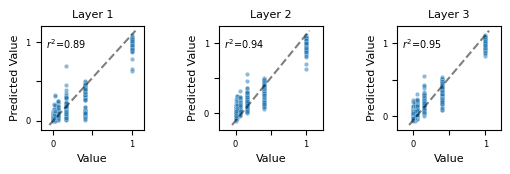

In [11]:
fig = plt.figure(figsize=(5.5, 1.75))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])
axs = [fig.add_subplot(gs[:,i]) for i in range(3)]

for layer in range(1, 4):
    ax = axs[layer-1]
    y = grid_results['test_y'][0][layer]
    pred_y = grid_results['test_pred'][0][layer]
    im = sns.scatterplot(x=y, y=pred_y, ax=ax, s=10, alpha=0.5)
    ax.set_aspect('equal', 'box')
    ax.set_box_aspect(1)
    ax.set_xticks([0, 0.5, 1.], labels=[r'0', '', r'1'], fontsize=6)
    ax.set_yticks([0, 0.5, 1.], labels=[r'0', '', r'1'], fontsize=6)
    for spine in ax.spines.values():
        spine.set_visible(True)
    ax.set_xlabel('Value', fontsize=8)
    ax.set_ylabel('Predicted Value', fontsize=8)
    ax.plot(ax.get_xlim(), ax.get_ylim(), 'k--', alpha=0.5)
    ax.set_title(f'Layer {layer}', fontsize=8)
    r2 = r2_score(y, pred_y)
    ax.text(0.05, 0.9, f'$r^2$={r2:.2f}', transform=ax.transAxes, fontsize=7, ha='left', va='top')
plt.tight_layout()
plt.savefig('figs_app/K_19B.png', transparent=True, dpi=300)
plt.savefig('figs_app/K_19B.pdf', transparent=True, dpi=300)
plt.show()

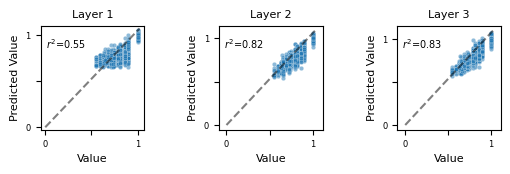

In [ ]:
fig = plt.figure(figsize=(5.5, 1.75))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])
axs = [fig.add_subplot(gs[:,i]) for i in range(3)]

for layer in range(1, 4):
    ax = axs[layer-1]
    y = euclid_results['test_y'][-1][layer]
    pred_y = euclid_results['test_pred'][-1][layer]
    im = sns.scatterplot(x=y, y=pred_y, ax=ax, s=10, alpha=0.5)
    ax.set_aspect('equal', 'box')
    ax.set_box_aspect(1)
    ax.set_xticks([0, 0.5, 1.], labels=[0, '', 1], fontsize=6)
    ax.set_yticks([0, 0.5, 1.], labels=[0, '', 1], fontsize=6)
    ax.set_xlabel('Value', fontsize=8)
    ax.set_ylabel('Predicted Value', fontsize=8)
    for spine in ax.spines.values():
        spine.set_visible(True)
    ax.plot(ax.get_xlim(), ax.get_ylim(), 'k--', alpha=0.5)
    ax.set_title(f'Layer {layer}', fontsize=8)
    r2 = r2_score(y, pred_y)
    ax.text(0.05, 0.9, f'$r^2$={r2:.2f}', transform=ax.transAxes, fontsize=7, ha='left', va='top')
plt.tight_layout()
plt.savefig('figs_app/K_19C.png', transparent=True, dpi=300)
plt.savefig('figs_app/K_19C.pdf', transparent=True, dpi=300)
plt.show()

# XY decoding-- Buffer Tokens

In [3]:
with open('pickles/09_buffer_token_decoding_x_y.pkl', 'rb') as f:
    results = pickle.load(f)

In [4]:
score_x = results['test_score_x']
score_y = results['test_score_y']
x = results['test_x']
pred_x = results['test_pred_x']
y = results['test_y']
pred_y = results['test_pred_y']


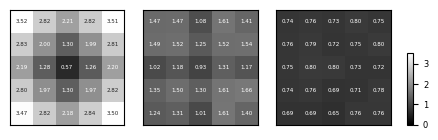

In [6]:
fig = plt.figure(figsize=(4.5, 1.5))
gs = fig.add_gridspec(3, 4, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1, 0.05])
axs = [fig.add_subplot(gs[:,i]) for i in range(3)]
cbar_ax = fig.add_subplot(gs[1:, 3])
x_unique = np.unique(x)
y_unique = np.unique(y)

score_grids = []
for layer in range(len(score_x)):
    ax = axs[layer]
    score_grid = np.full((len(y_unique), len(x_unique)), np.nan)
    _score_x = np.array(score_x[layer])
    _score_y = np.array(score_y[layer])
    _x = np.array(x[layer])
    _y = np.array(y[layer])
    for x_idx, x_val in enumerate(x_unique):
        for y_idx, y_val in enumerate(y_unique):
            mask = (_x == x_val) & (_y == y_val)
            if np.any(mask):
                combined_score = _score_x + _score_y
                score_grid[y_idx, x_idx] = np.mean(combined_score[mask])
    score_grids.append(score_grid)

vmin = 0 #min(m.min() for m in score_grids)
vmax = max(m.max() for m in score_grids)    
for layer, score_grid in enumerate(score_grids):       # Plot heatmap
    ax = axs[layer]
    im = sns.heatmap(score_grid, annot=True, fmt=".2f", cmap="gray", 
                            xticklabels=x_unique, yticklabels=y_unique, ax=ax,
                            vmin=vmin, vmax=vmax, cbar=False, annot_kws={'size': 4},
                            square=True)
    ax.set_aspect('equal', 'box')
    ax.set_box_aspect(1)
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(True)

cbar = fig.colorbar(im.collections[0], cax=cbar_ax)
cbar.ax.tick_params(labelsize=6)

# Adjust layout to prevent overlap
plt.tight_layout()  # Leave space for colorbar
plt.savefig('figs_app/M_21C.png', transparent=True, dpi=300)
plt.savefig('figs_app/M_21C.pdf', transparent=True, dpi=300)
plt.show()

# Angle to Goal

In [7]:
with open('pickles/09_buffer_token_decoding_goal_angle.pkl', 'rb') as f:
    results = pickle.load(f)

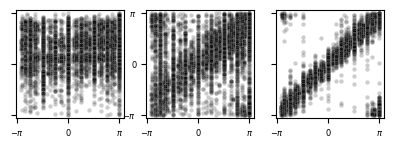

In [8]:
fig = plt.figure(figsize=(4.75, 1.75))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1])
axs = [fig.add_subplot(gs[:,i]) for i in range(3)]

for layer in range(len(score_x)):
    ax = axs[layer]
    y = results['test_y'][layer]
    pred_y = results['test_pred'][layer]
    im = sns.scatterplot(x=y, y=pred_y, ax=ax, s=10, alpha=0.2, color='black')
    ax.set_aspect('equal', 'box')
    ax.set_box_aspect(1)
    ax.set_xticks([np.pi, 0, -np.pi], labels=[r'$\pi$', '0', r'$-\pi$'], fontsize=6)
    if layer == 1:
        ax.set_yticks([np.pi, 0, -np.pi], labels=[r'$\pi$', '0', r'$-\pi$'], fontsize=6)
    else:
        ax.set_yticks([np.pi, 0, -np.pi], labels=['', '', ''], fontsize=6)
    for spine in ax.spines.values():
        spine.set_visible(True)

# Adjust layout to prevent overlap
plt.savefig('figs_app/M_21D.png', transparent=True, dpi=300)
plt.savefig('figs_app/M_21D.pdf', transparent=True, dpi=300)
plt.show()